In [172]:
%pip install prettytable
%pip install xgboost
%pip install imbalanced-learn
%pip install pandas numpy seaborn matplotlib scikit-learn

DEPRECATION: Loading egg at /Users/aswath/anaconda3/lib/python3.11/site-packages/nsgaiii-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /Users/aswath/anaconda3/lib/python3.11/site-packages/nsgaiii-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /Users/aswath/anaconda3/lib/python3.11/site-packages/nsgaiii-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /Users/aswath/anaconda3/lib/python3.11/site-packages/nsgaiii-0.1.0-py3.11.egg is dep

In [173]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [174]:
data = pd.read_csv("modified_employee_data.csv", encoding = "ISO-8859-1", engine="python")

In [175]:
#EDA

In [176]:
data.head()

,employee_id,designation,no_of_trainings,length_of_service,avg_training_score,is_promoted
0,65438,Data Analyst,1,8,49.0,0
1,65141,Software Engineer,1,4,60.0,0
2,7513,DevOps Engineer,1,7,50.0,0
3,2542,Data Scientist,2,10,50.0,0
4,48945,Manager,1,2,73.0,0


In [177]:
data.tail()

,employee_id,designation,no_of_trainings,length_of_service,avg_training_score,is_promoted
54803,3030,Principle Architect,1,17,78.0,0
54804,74592,Principle Architect,1,6,56.0,0
54805,13918,Admin,1,3,79.0,0
54806,13614,DevOps Engineer,1,2,NaN,0
54807,51526,DevOps Engineer,1,5,49.0,0


In [178]:
data.columns

Index(['employee_id', 'designation', 'no_of_trainings', 'length_of_service',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [179]:
data.shape

(54808, 6)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   designation         54808 non-null  object 
 2   no_of_trainings     54808 non-null  int64  
 3   length_of_service   54808 non-null  int64  
 4   avg_training_score  52248 non-null  float64
 5   is_promoted         54808 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ MB


In [181]:
data.dtypes

employee_id             int64
designation            object
no_of_trainings         int64
length_of_service       int64
avg_training_score    float64
is_promoted             int64
dtype: object

In [182]:
np.sum(data.isnull().any(axis=1))

2560

In [183]:
data.isnull().sum()

employee_id              0
designation              0
no_of_trainings          0
length_of_service        0
avg_training_score    2560
is_promoted              0
dtype: int64

In [184]:
data.describe()

,employee_id,no_of_trainings,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,5.865512,63.712238,0.085170
std,22586.581449,0.609264,4.265094,13.521910,0.279137
min,1.000000,1.000000,1.000000,39.000000,0.000000
25%,19669.750000,1.000000,3.000000,51.000000,0.000000
50%,39225.500000,1.000000,5.000000,60.000000,0.000000
75%,58730.500000,1.000000,7.000000,77.000000,0.000000
max,78298.000000,10.000000,37.000000,99.000000,1.000000


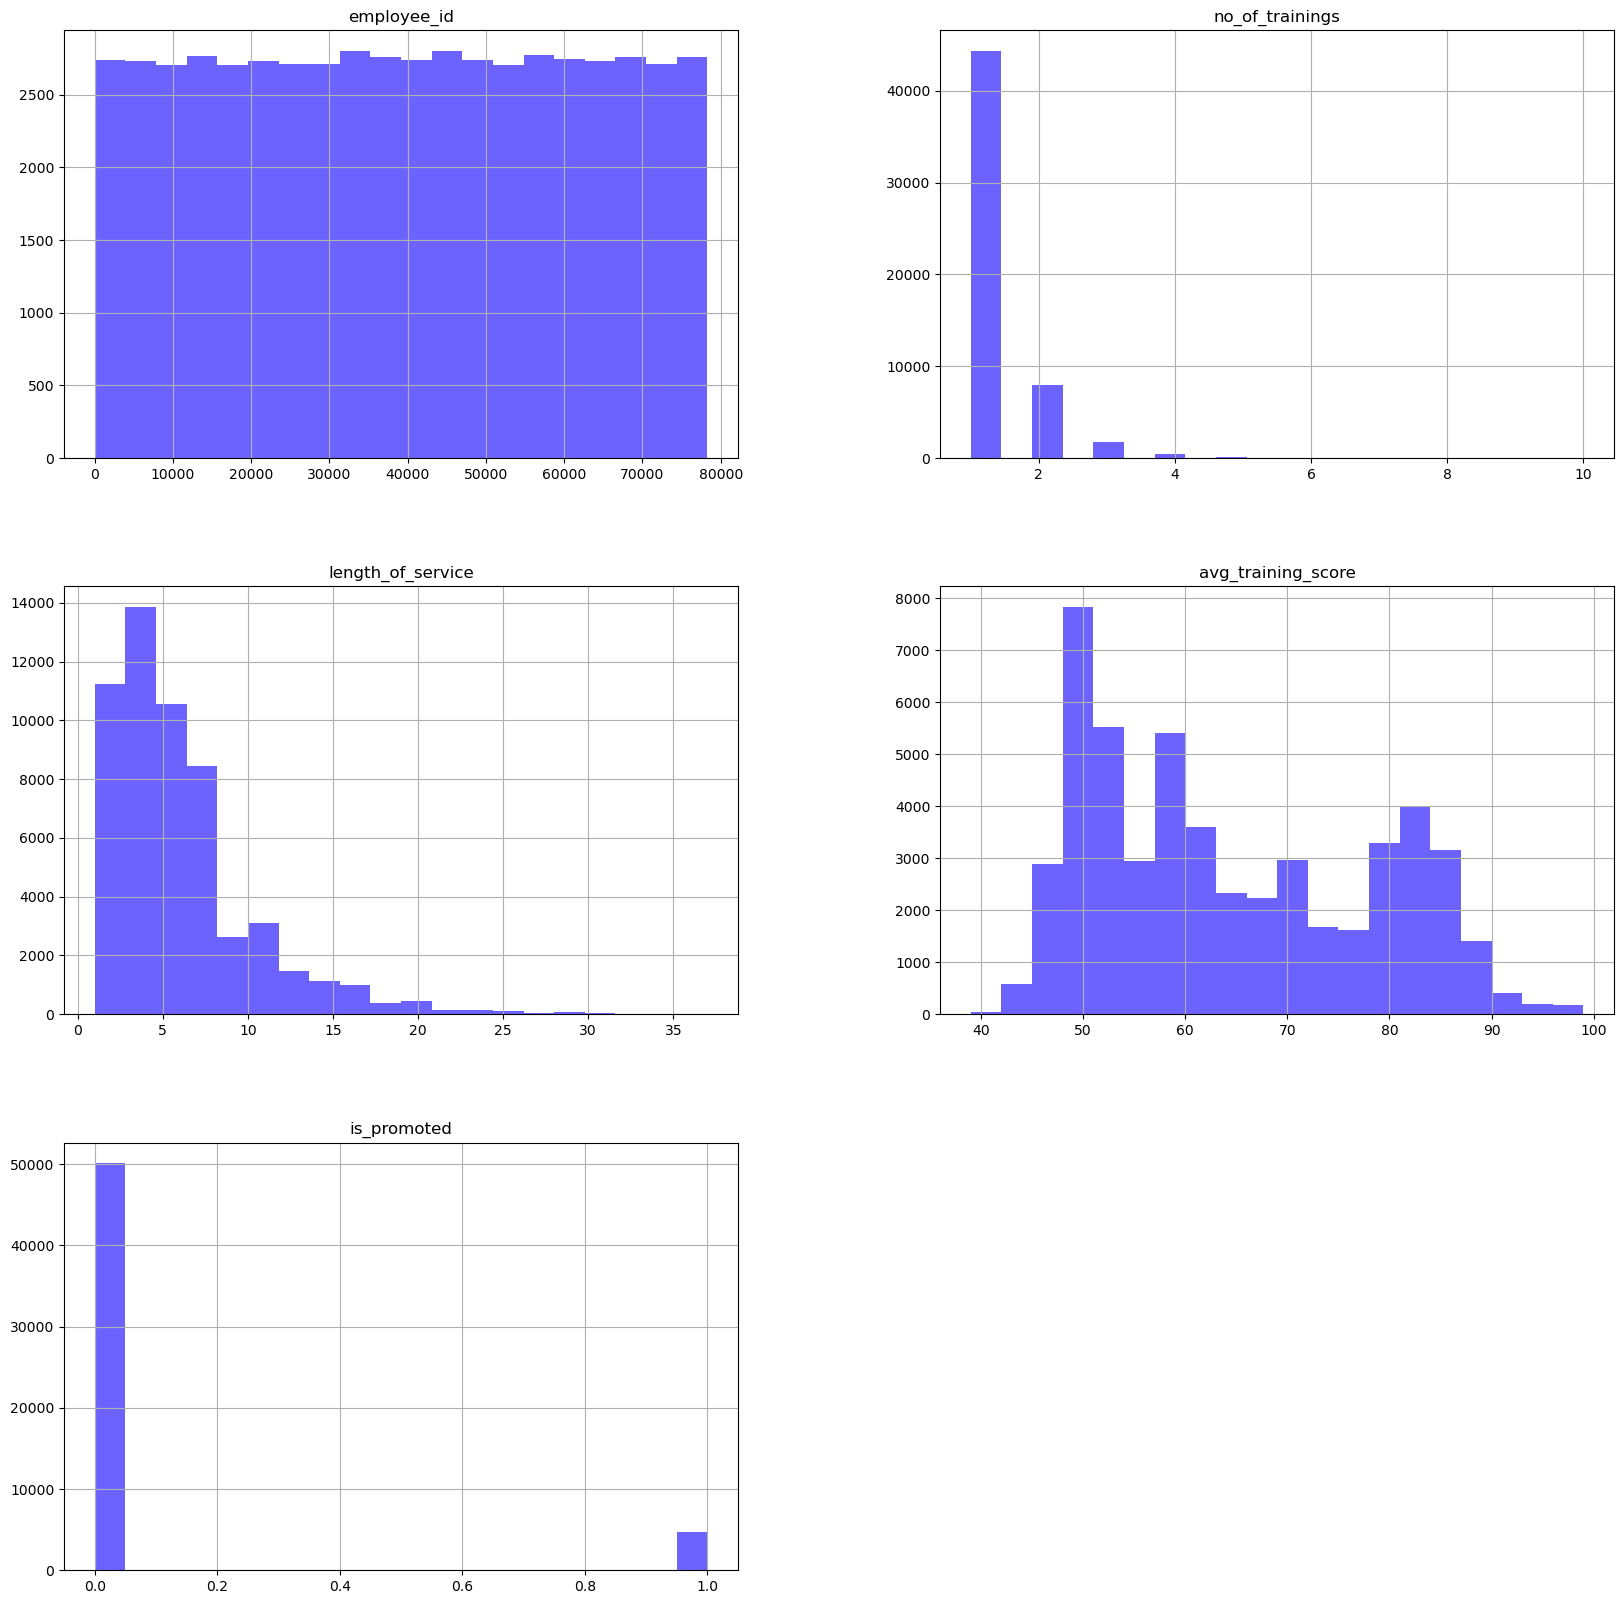

In [185]:
#Numeric features distrubution
data.hist(figsize=(20,20),bins = 20, color="#6C63FF")
plt.title("Numeric Features Distribution")
plt.show()

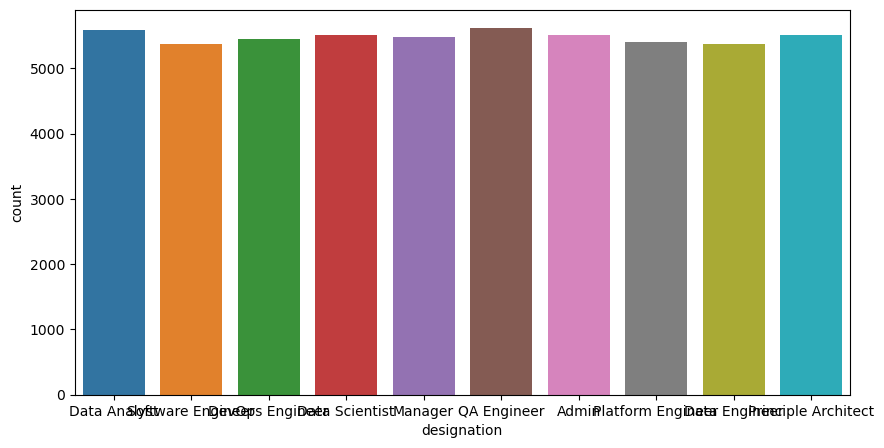

In [186]:
#designation distribution
sns.countplot(data= data, x = "designation")
plt.show()

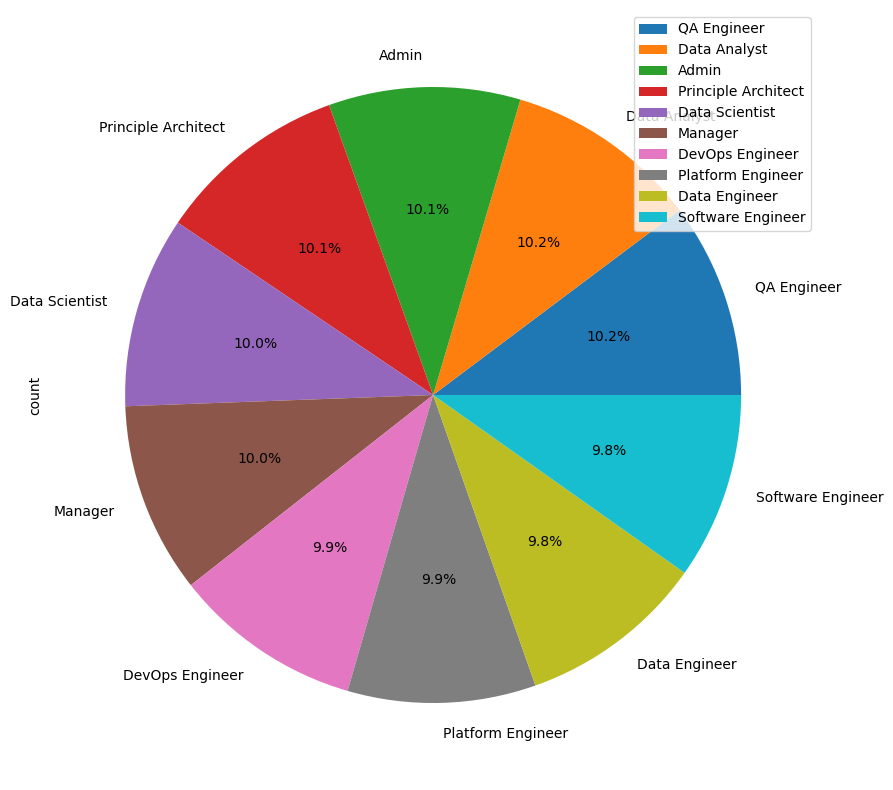

In [187]:
data["designation"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

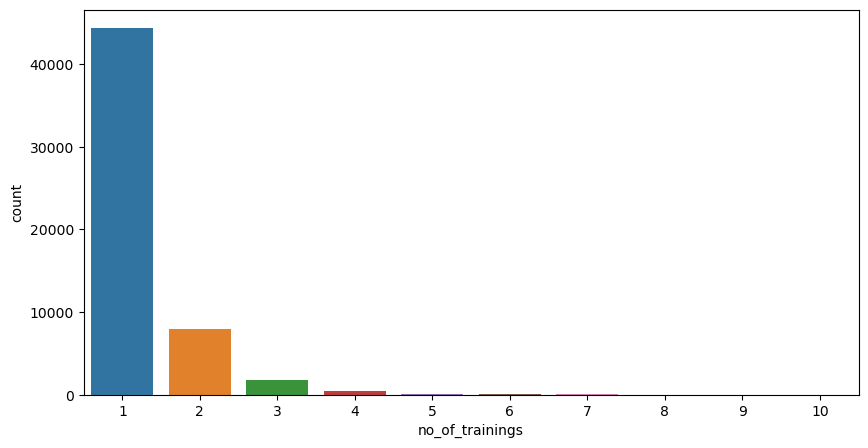

In [188]:
#no_of_trainings distribution
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

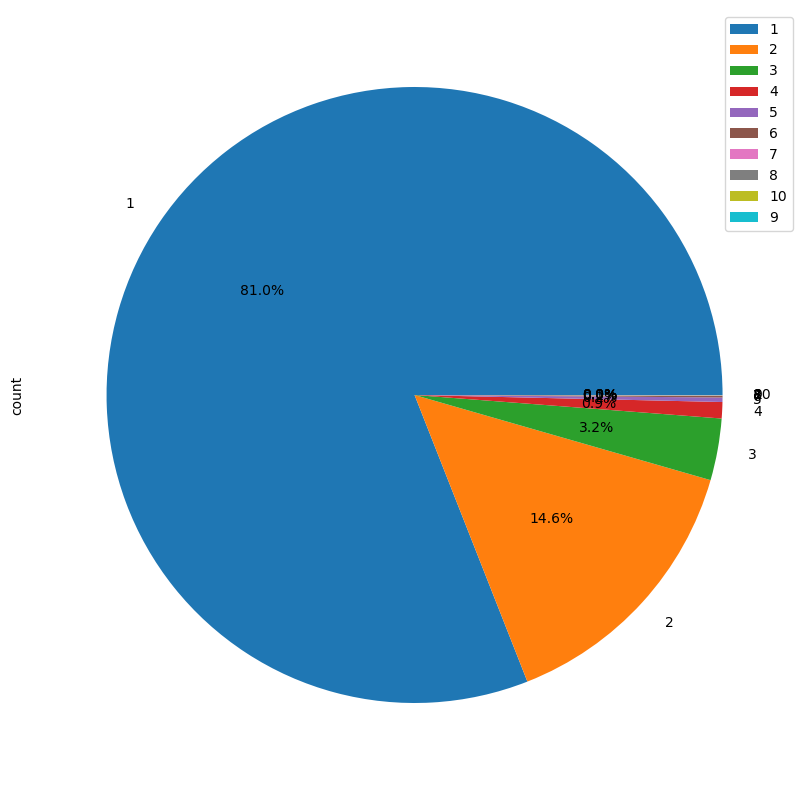

In [189]:
data["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

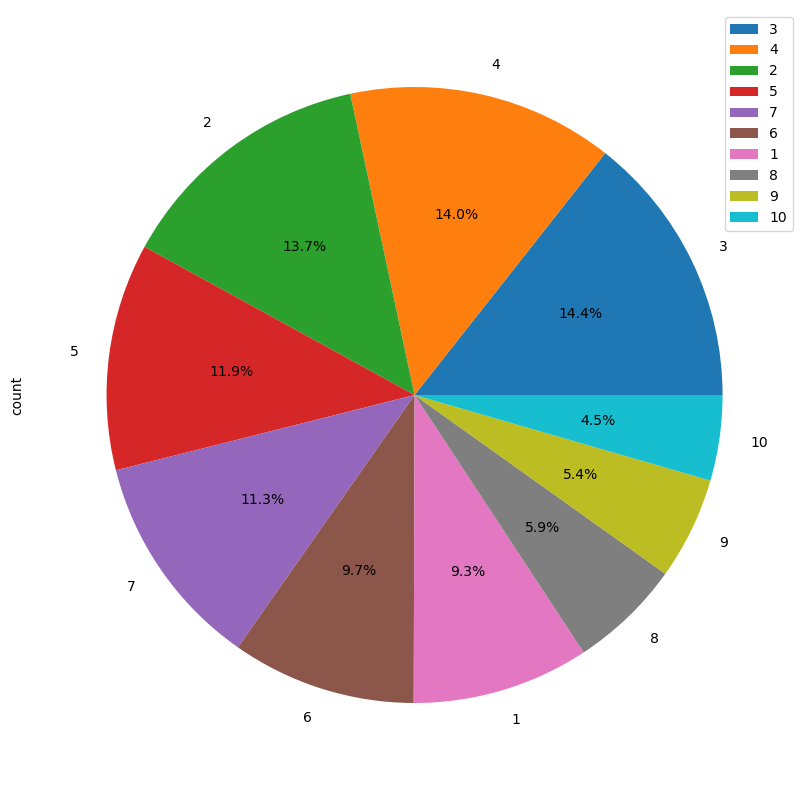

In [190]:
data["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

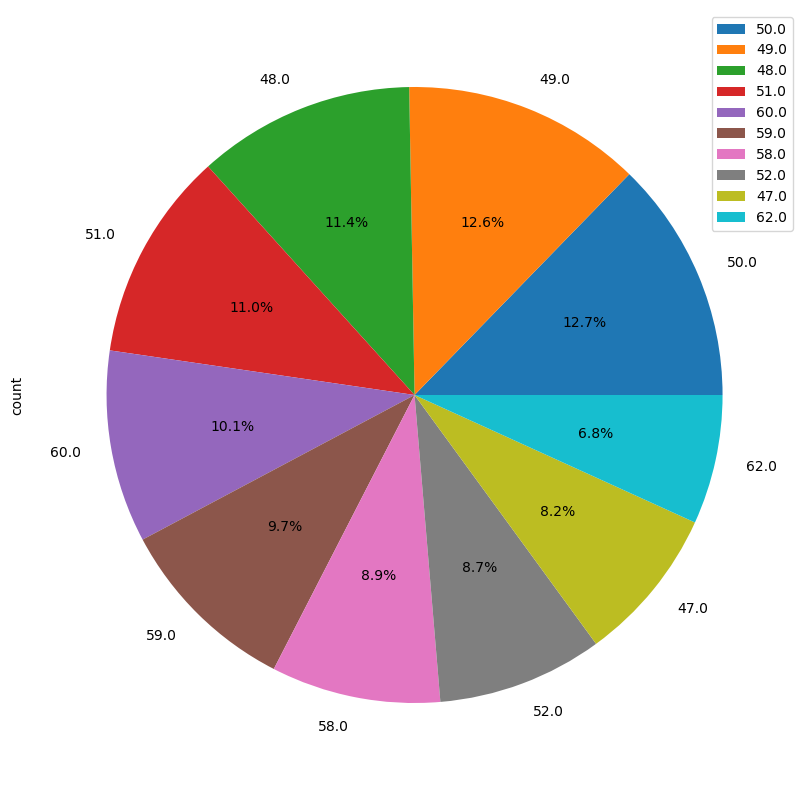

In [191]:
#avg_training_score distribution
data["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

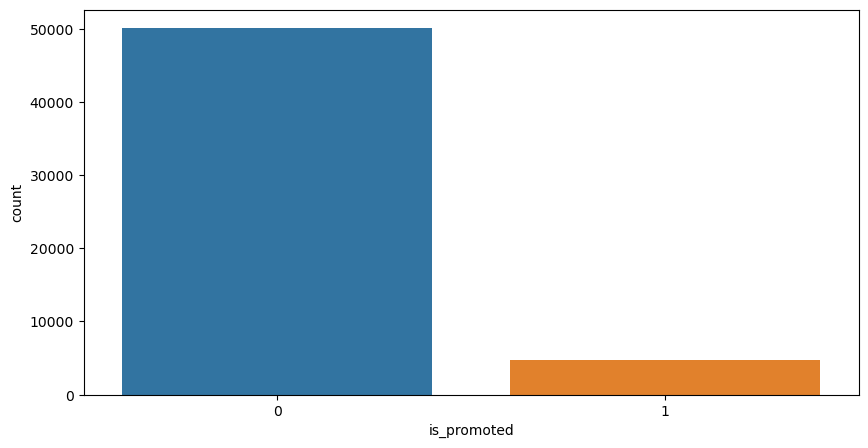

In [192]:
#is_promoted distribution
sns.countplot(data= data, x = "is_promoted")
plt.show()

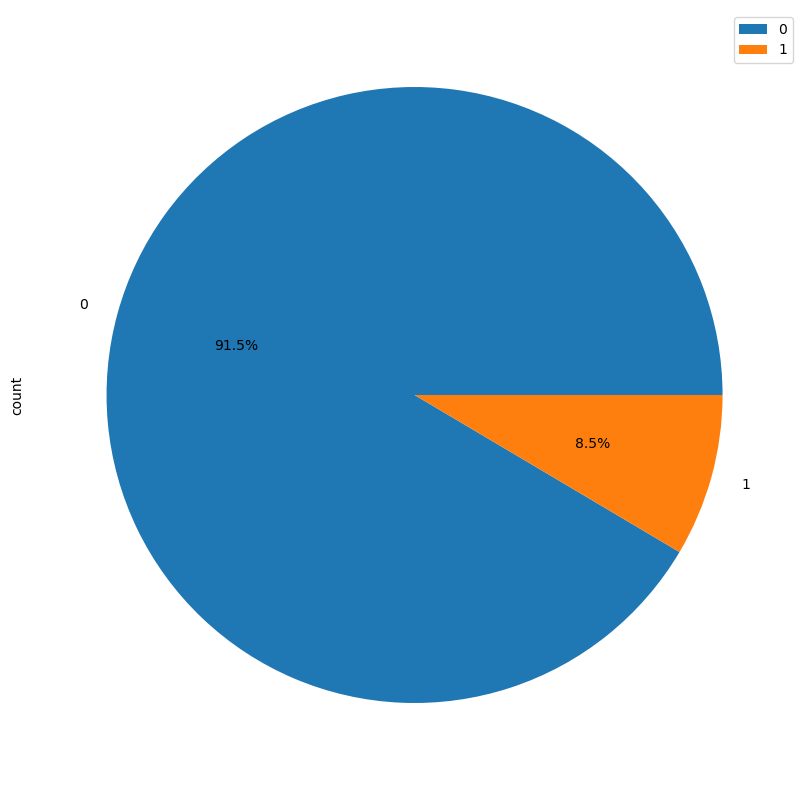

In [193]:
data["is_promoted"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [194]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

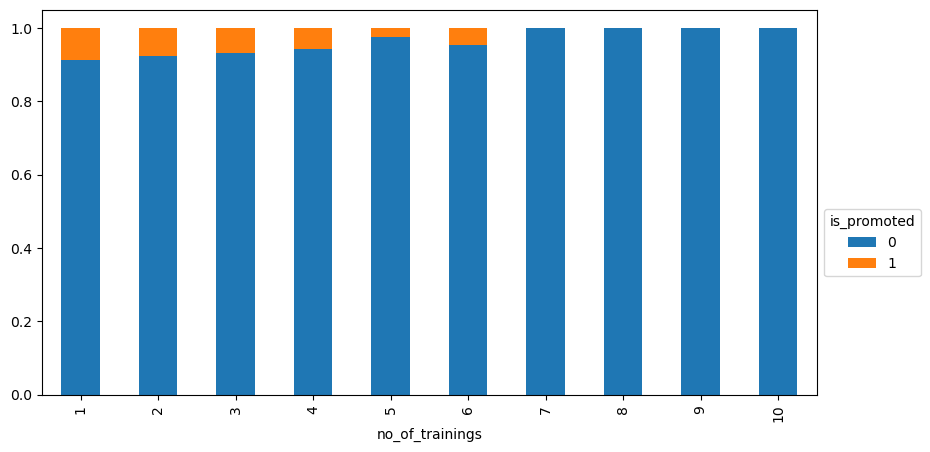

In [195]:
#Distribution of promoted employees ratio across different no_of_trainings
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.no_of_trainings,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

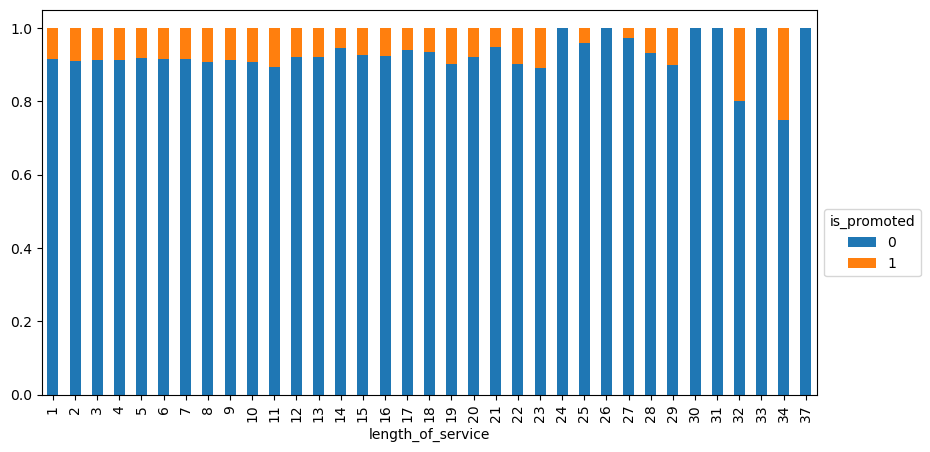

In [196]:
#Distribution of promoted employees ratio across different length_of_service
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.length_of_service,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

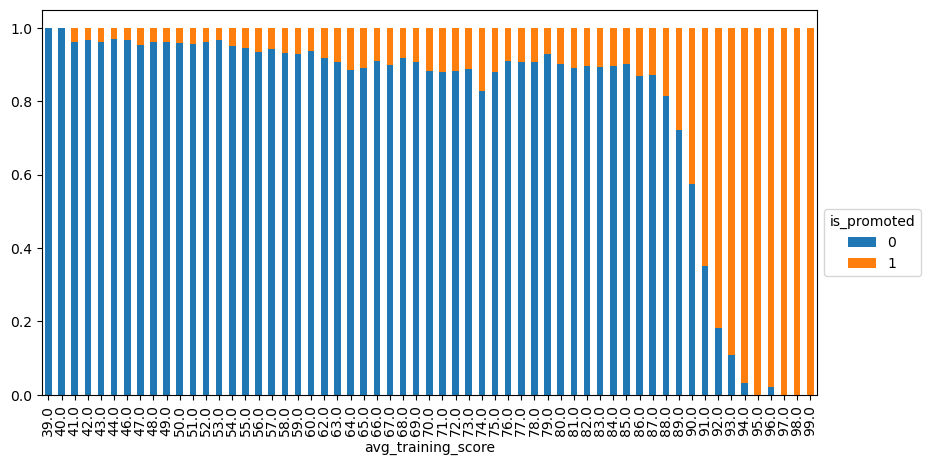

In [197]:
#Distribution of promoted employees ratio across different avg_training_score
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.avg_training_score,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

In [198]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['designation'])
data['designation'] = encpro

<Axes: title={'center': 'Pearson Correlation of Features'}>

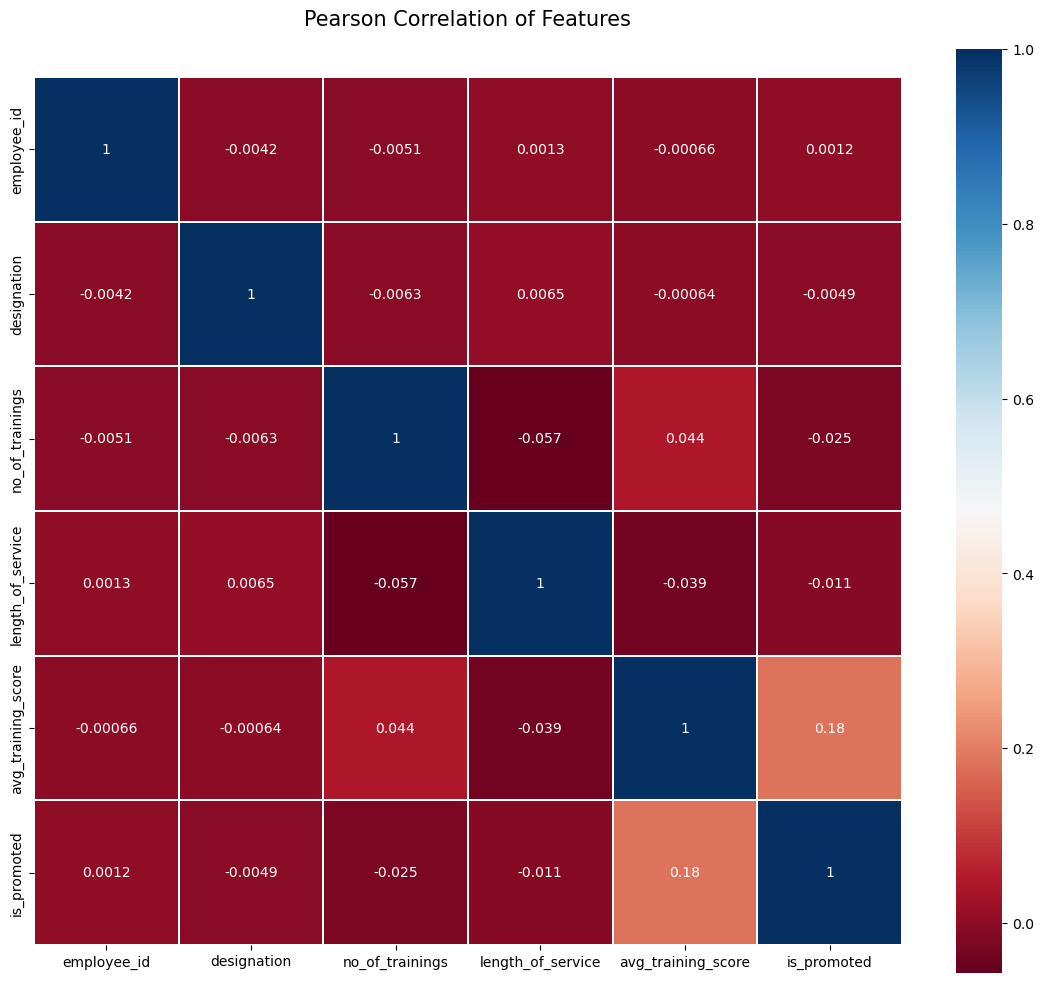

In [199]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

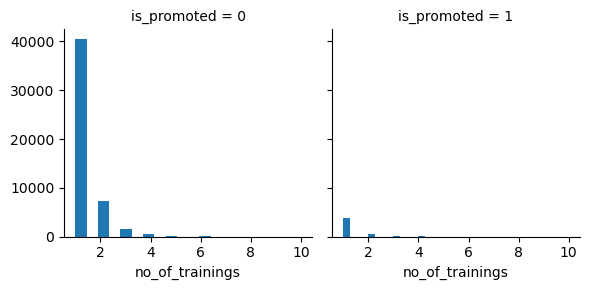

In [200]:
#no_of_trainings plot with is_promoted
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

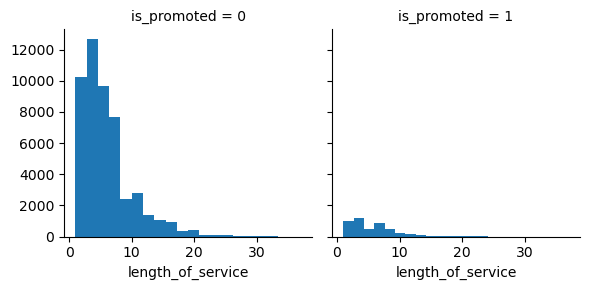

In [201]:
#length_of_service plot with is_promoted
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

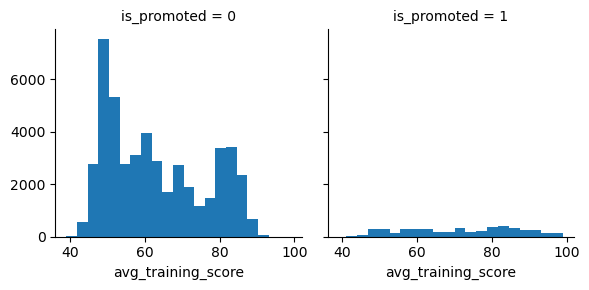

In [202]:
#avg_training_score plot with is_promoted
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

In [203]:
#Data Pre-Processing

In [204]:
data=data.drop_duplicates()

In [205]:
data.isnull().sum()

employee_id              0
designation              0
no_of_trainings          0
length_of_service        0
avg_training_score    2560
is_promoted              0
dtype: int64

In [206]:
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [207]:
data.isnull().sum()

employee_id           0
designation           0
no_of_trainings       0
length_of_service     0
avg_training_score    0
is_promoted           0
dtype: int64

In [208]:
#Building Model

In [209]:
X=data.drop(columns=['is_promoted', 'employee_id'])
y=data['is_promoted']

X = pd.get_dummies(X)

X = X.apply(pd.to_numeric, errors='coerce')

smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

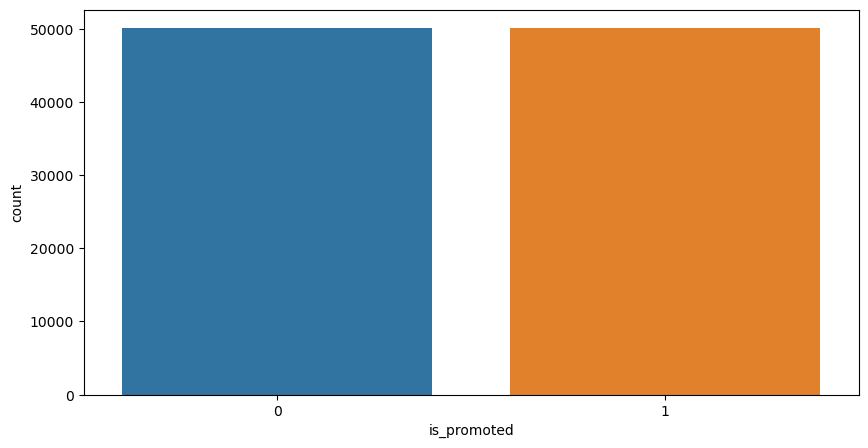

In [210]:
sns.countplot(data= data, x = y_up)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(verbosity=0),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.80
Precision: 0.78
Recall: 0.81
F1 Score: 0.80
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     15105
           1       0.78      0.81      0.80     14979

    accuracy                           0.80     30084
   macro avg       0.80      0.80      0.80     30084
weighted avg       0.80      0.80      0.80     30084


Model: Decision Tree
Accuracy: 0.80
Precision: 0.80
Recall: 0.82
F1 Score: 0.81
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     15105
           1       0.80      0.82      0.81     14979

    accuracy                           0.80     30084
   macro avg       0.80      0.80      0.80     30084
weighted avg       0.80      0.80      0.80     30084


Model: XGBoost
Accuracy: 0.72
Precision: 0.73
Recall: 0.69
F1 Score: 0.71
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     15105


In [213]:
# Get coefficients for Logistic Regression
log_reg = models['Logistic Regression']
coefficients = log_reg.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 5 Coefficients for Logistic Regression:")
print(coef_df.head(5))


Top 5 Coefficients for Logistic Regression:
              Feature  Coefficient
3  avg_training_score     0.635091
1     no_of_trainings    -0.448704
0         designation    -0.100984
2   length_of_service    -0.098675


In [214]:
def predict_promotion(model, employee_data):
    employee_df = pd.DataFrame([employee_data])
    employee_encoded = pd.get_dummies(employee_df)
    
    # Add missing columns that exist in the training data
    for col in X.columns:
        if col not in employee_encoded.columns:
            employee_encoded[col] = 0
    
    # Align the columns to match the training data
    employee_encoded = employee_encoded[X.columns]
    
    # Standardize the numeric features
    employee_encoded = scaler.transform(employee_encoded)
    
    # Predict promotion
    prediction = model.predict(employee_encoded)
    return "Promoted" if prediction[0] == 1 else "Not Promoted"

In [215]:
# Example new employee data
new_employee = {
    'designation': 'Sales & Marketing',
    'no_of_trainings': 5,
    'length_of_service': 2,
    'avg_training_score': 40.0,
}

# Making predictions with all models
for name, model in models.items():
    print(f"\nPrediction for new employee using {name}: {predict_promotion(model, new_employee)}")


Prediction for new employee using Random Forest: Not Promoted

Prediction for new employee using Decision Tree: Not Promoted

Prediction for new employee using XGBoost: Not Promoted

Prediction for new employee using Logistic Regression: Not Promoted


In [216]:
#Downsampled

In [217]:
data["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [218]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted = not_promoted.sample(len(promoted), random_state=42) #getting only 4668 fromnot employees to down sample the data equal
downsample = pd.concat([promoted, not_promoted]).reset_index(drop=True) #now combining both
downsample['avg_training_score'].unique()

array([50., 51., 47., 58., 84., 78., 49., 65., 60., 69., 63., 57., 90.,
       86., 72., 92., 89., 88., 70., 56., 48., 94., 93., 95., 83., 75.,
       62., 68., 96., 64., 52., 59., 76., 46., 87., 74., 91., 82., 55.,
       73., 81., 85., 99., 77., 54., 80., 67., 53., 66., 71., 97., 79.,
       44., 98., 43., 42., 41., 40.])

<Axes: xlabel='is_promoted', ylabel='count'>

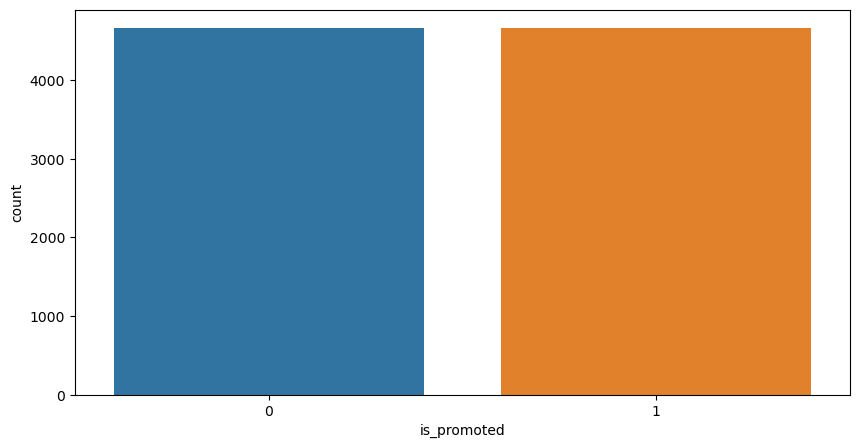

In [219]:
sns.countplot(data= data, x = downsample['is_promoted'])

In [220]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted', 'employee_id']), downsample['is_promoted'], test_size=0.3, random_state=2)

In [221]:
models1 = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(verbosity=0),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

for name, model in models1.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.57
Precision: 0.58
Recall: 0.55
F1 Score: 0.56
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1373
           1       0.58      0.55      0.56      1428

    accuracy                           0.57      2801
   macro avg       0.57      0.57      0.57      2801
weighted avg       0.57      0.57      0.57      2801


Model: Decision Tree
Accuracy: 0.54
Precision: 0.56
Recall: 0.47
F1 Score: 0.51
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1373
           1       0.56      0.47      0.51      1428

    accuracy                           0.54      2801
   macro avg       0.55      0.54      0.54      2801
weighted avg       0.55      0.54      0.54      2801


Model: XGBoost
Accuracy: 0.60
Precision: 0.62
Recall: 0.55
F1 Score: 0.58
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1373


In [223]:
# Get coefficients for Logistic Regression
log_reg = models['Logistic Regression']
coefficients = log_reg.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 5 Coefficients for Logistic Regression:")
print(coef_df.head(5))


Top 5 Coefficients for Logistic Regression:
              Feature  Coefficient
3  avg_training_score     0.635091
1     no_of_trainings    -0.448704
0         designation    -0.100984
2   length_of_service    -0.098675


In [224]:
def predict_promotion1(model, employee_data):
    employee_df = pd.DataFrame([employee_data])
    employee_encoded = pd.get_dummies(employee_df)
    
    # Add missing columns that exist in the training data
    for col in X.columns:
        if col not in employee_encoded.columns:
            employee_encoded[col] = 0
    
    # Align the columns to match the training data
    employee_encoded = employee_encoded[X.columns]
    
    # Standardize the numeric features
    employee_encoded = scaler.transform(employee_encoded)
    
    # Predict promotion
    prediction = model.predict(employee_encoded)
    return "Promoted" if prediction[0] == 1 else "Not Promoted"

In [240]:
# Example new employee data
new_employee = {
    'designation': 'admin',
    'no_of_trainings': 1,
    'length_of_service': 9,
    'avg_training_score': 100.0,
}

# Making predictions with all models
for name, model in models1.items():
    print(f"\nPrediction for new employee using {name}: {predict_promotion(model, new_employee)}")


Prediction for new employee using Random Forest: Promoted

Prediction for new employee using Decision Tree: Promoted

Prediction for new employee using XGBoost: Promoted

Prediction for new employee using Logistic Regression: Promoted
